ref : https://twinsynergy.co.th/70-machine-learning-datasets-project-ideas/

download dataset : https://www.kaggle.com/shwetabh123/mall-customers/download

1. Mall Customers Dataset

The Mall Customers เป็นชุดข้อมูลเกี่ยวกับผู้คนที่มาเยี่ยมชมห้างสรรพสินค้า ภายในชุดข้อมูลประกอบไปด้วย เพศ, รหัสลูกค้า, อายุ, รายได้ต่อปี และคะแนนการใช้จ่ายในแต่ละครั้ง ถูกเก็บรวบรวมและจัดกลุ่มลูกค้าตามพฤติกรรมการใช้บริการของลูกค้าแต่ละคน

Data Science Project Idea: การแบ่งกลุ่มลูกค้าตามอายุ เพศ ความสนใจ เป็นสิ่งสำคัญในการแบ่งฐานลูกค้าออกเป็นกลุ่มย่อย ๆ ซึ่งแต่ละกลุ่มมีความคล้ายคลึงกันมาก มีประโยชน์ในการทำการตลาด (Customised Marketing)

## Import Libraries

In [ ]:
# Import fundamental libreries
import pandas as pd
import matplotlib.pyplot as plt
# clustering with K-means
from sklearn.cluster import KMeans
# use for normalize dataset
from sklearn.preprocessing import MinMaxScaler

## Import dataset

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Preprocessing

In [ ]:
# check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


don't have missing value!

In [ ]:
# normalize dataset
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])


scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020
3,4,Female,0.096154,0.008197,0.775510
4,5,Female,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0.795918
196,197,Female,0.519231,0.909836,0.275510
197,198,Male,0.269231,0.909836,0.744898
198,199,Male,0.269231,1.000000,0.173469


## Elbow Method for finding best K

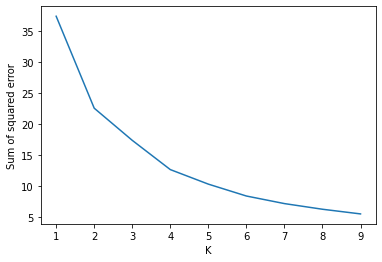

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

best k = 4

## Clustering

In [ ]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 3, 3, 2, 3, 2, 3, 0, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,0.387755,1
1,2,Male,0.057692,0.000000,0.816327,1
2,3,Female,0.038462,0.008197,0.051020,1
3,4,Female,0.096154,0.008197,0.775510,1
4,5,Female,0.250000,0.016393,0.397959,1
...,...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0.795918,3
196,197,Female,0.519231,0.909836,0.275510,2
197,198,Male,0.269231,0.909836,0.744898,3
198,199,Male,0.269231,1.000000,0.173469,2


In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

In [ ]:
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
6,7,Female,0.326923,0.024590,0.051020,0
8,9,Male,0.884615,0.032787,0.020408,0
10,11,Male,0.942308,0.032787,0.132653,0
12,13,Female,0.769231,0.040984,0.142857,0
14,15,Male,0.365385,0.040984,0.122449,0


In [ ]:
df2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,0.387755,1
1,2,Male,0.057692,0.000000,0.816327,1
2,3,Female,0.038462,0.008197,0.051020,1
3,4,Female,0.096154,0.008197,0.775510,1
4,5,Female,0.250000,0.016393,0.397959,1


In [ ]:
df3.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
112,113,Female,0.384615,0.401639,0.418367,2
121,122,Female,0.384615,0.426230,0.397959,2
124,125,Female,0.096154,0.450820,0.285714,2
126,127,Male,0.480769,0.459016,0.346939,2
130,131,Male,0.557692,0.459016,0.081633,2


In [ ]:
df4.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
122,123,Female,0.423077,0.442623,0.581633,3
123,124,Male,0.403846,0.442623,0.918367,3
125,126,Female,0.250000,0.450820,0.775510,3
127,128,Male,0.423077,0.459016,0.959184,3
129,130,Male,0.384615,0.459016,0.755102,3
